<a href="https://colab.research.google.com/github/vainaijr/flashtorch/blob/master/examples/activation_maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/MisaOgura/flashtorch/blob/master/examples/activation_maximization_colab.ipynb)

## Activation maximization

---

[Activation maximization](https://pdfs.semanticscholar.org/65d9/94fb778a8d9e0f632659fb33a082949a50d3.pdf) is one form of feature visualization that allows us to visualize what CNN filters are "looking for", by applying each filter to an input image and updating the input image so as to maximize the activation of the filter of interest (i.e. treating it as a gradient ascent task with filter activation values as the loss).

The optimization and visualization is available via `flashtorch.activmax.GradientAscent`. The implementation is inspired by [this demo](https://blog.keras.io/category/demo.html) by Francois Chollet.

### 0. Set up

In [1]:
# Install flashtorch if you don't have it

!pip install flashtorch

  Created wheel for flashtorch: filename=flashtorch-0.1.0-cp36-none-any.whl size=28576 sha256=dadd83a9a6e1b0c23f06ae8653eb711ab706c277cfc508802b265d1dba2e20b9
  Stored in directory: /root/.cache/pip/wheels/b1/ca/ce/774a0c57a863f51ee8126ba22e75d5f5ed40f5c02d5862068e
Successfully built flashtorch


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torchvision.models as models

from flashtorch.activmax import GradientAscent

### 1. Load a pre-trained Model

In [3]:
model = models.vgg16(pretrained=True)

# Print layers and corresponding indicies

list(model.features.named_children())

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 108600833.31it/s]


[('0', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('1', ReLU(inplace)),
 ('2', Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('3', ReLU(inplace)),
 ('4',
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)),
 ('5', Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('6', ReLU(inplace)),
 ('7', Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('8', ReLU(inplace)),
 ('9',
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)),
 ('10', Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('11', ReLU(inplace)),
 ('12', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('13', ReLU(inplace)),
 ('14', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('15', ReLU(inplace)),
 ('16',
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)),
 ('17', Conv2d(256, 512, kernel_size=(3, 

### 2. Specify layers and filters

In [0]:
conv1_2 = model.features[2]
conv1_2_filters = [17, 33, 34, 57]

conv2_1 = model.features[5]
conv2_1_filters = [27, 40, 68, 73]

conv3_1 = model.features[10]
conv3_1_filters = [31, 61, 147, 182]

conv4_1 = model.features[17]
conv4_1_filters = [238, 251, 338, 495]

conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 409]

### 3. Optimize and visualize filters

Creating an instance of `GradientAscent` class with the model _without fully-connected layers_ allows us to use flexible input image sizes.

In [0]:
g_ascent = GradientAscent(model.features)

By calling the `visualize` method and passing in the layer and filter indeciies defined above, it performs optimization and visualization.

This is perhaps the most common way to use the `GradientAscent` class, but there are other APIs available according to your use cases (see section 4).

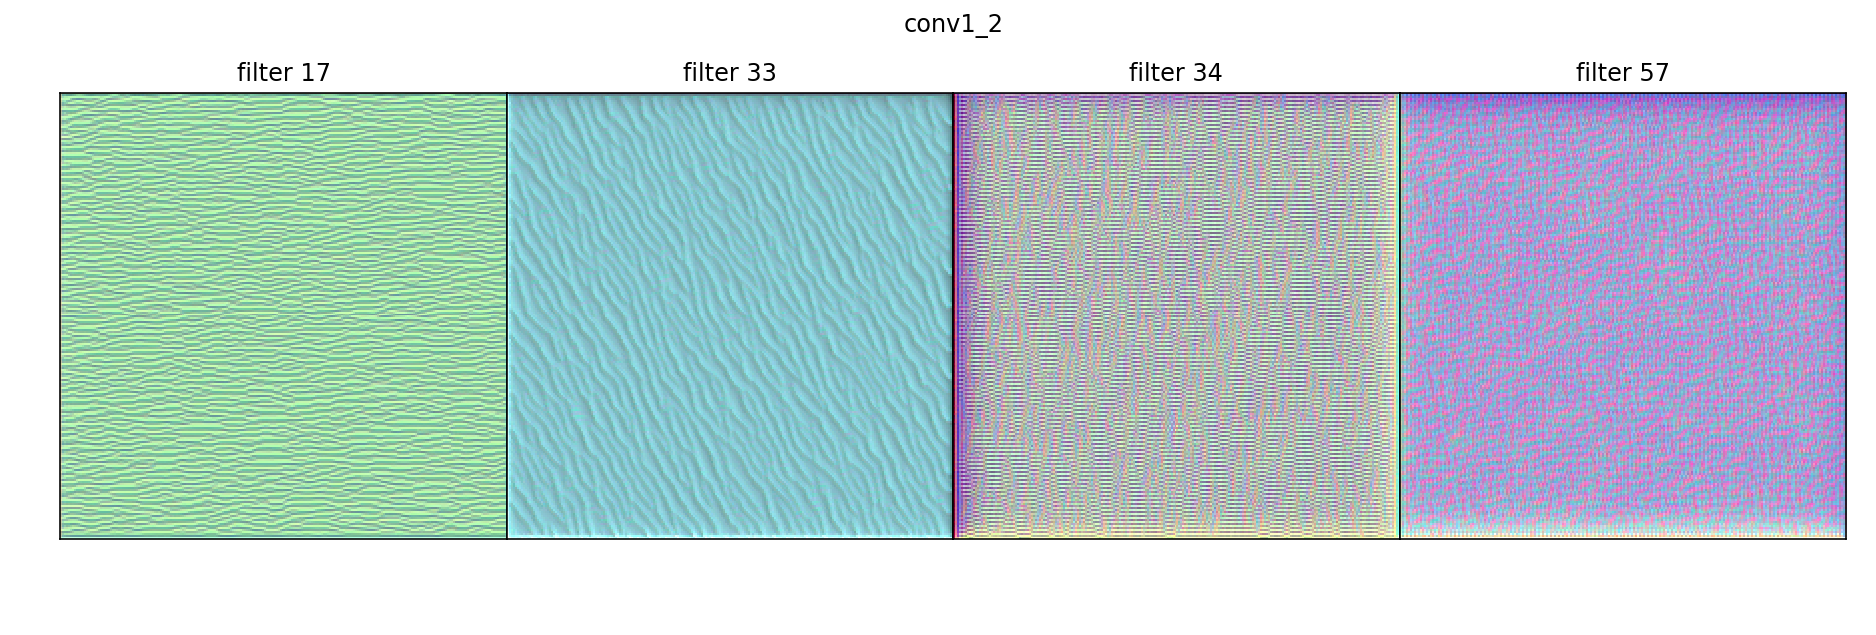

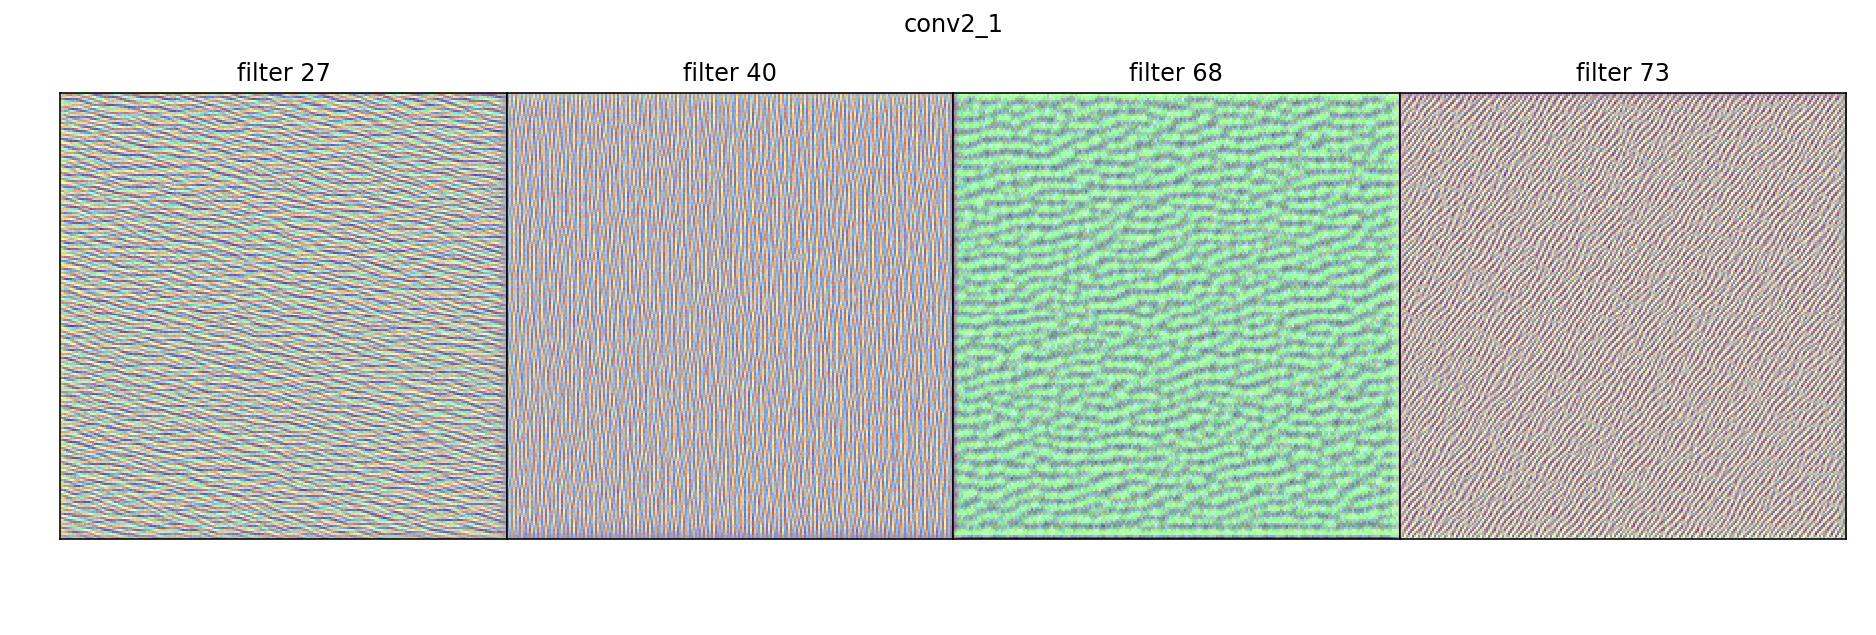

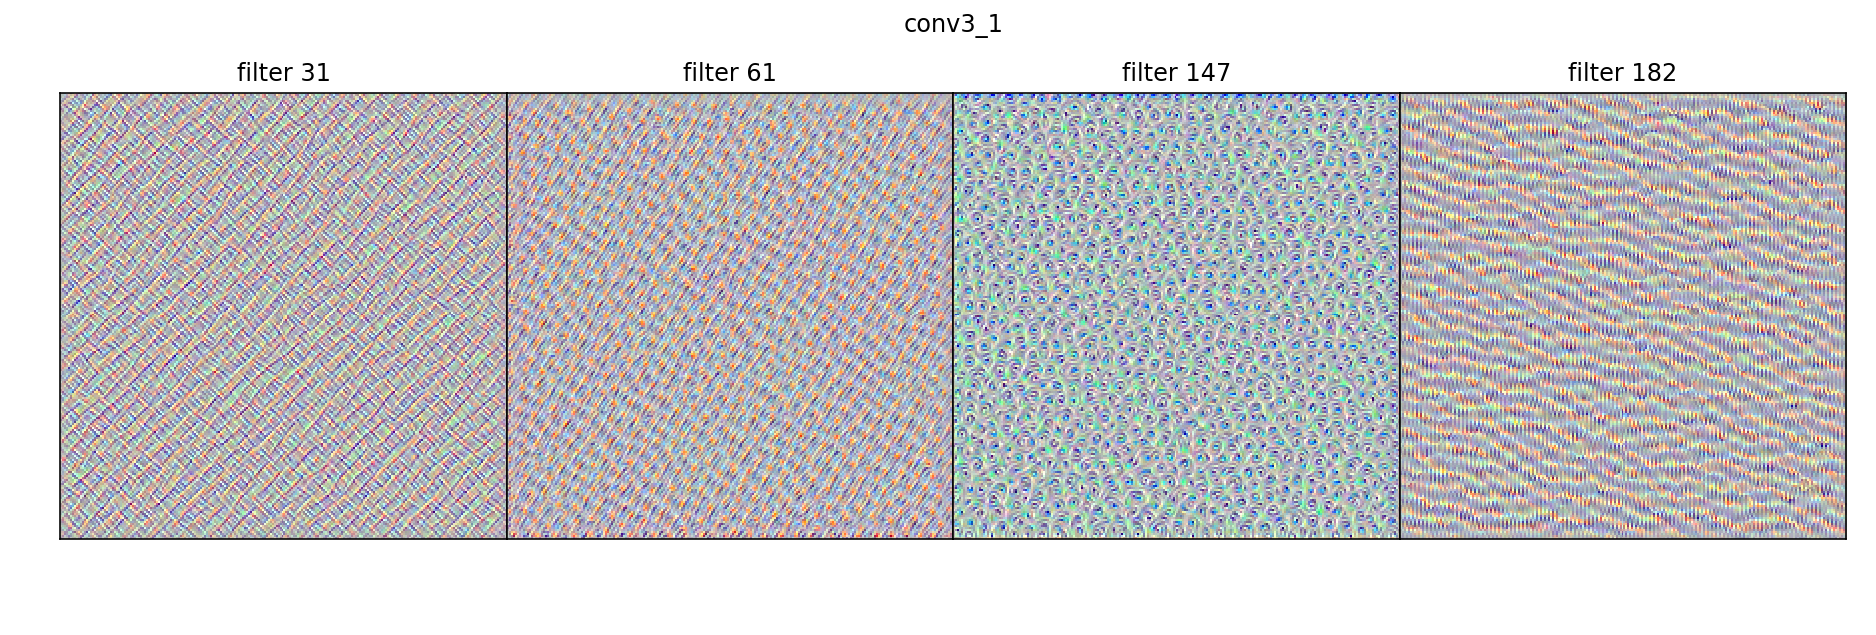

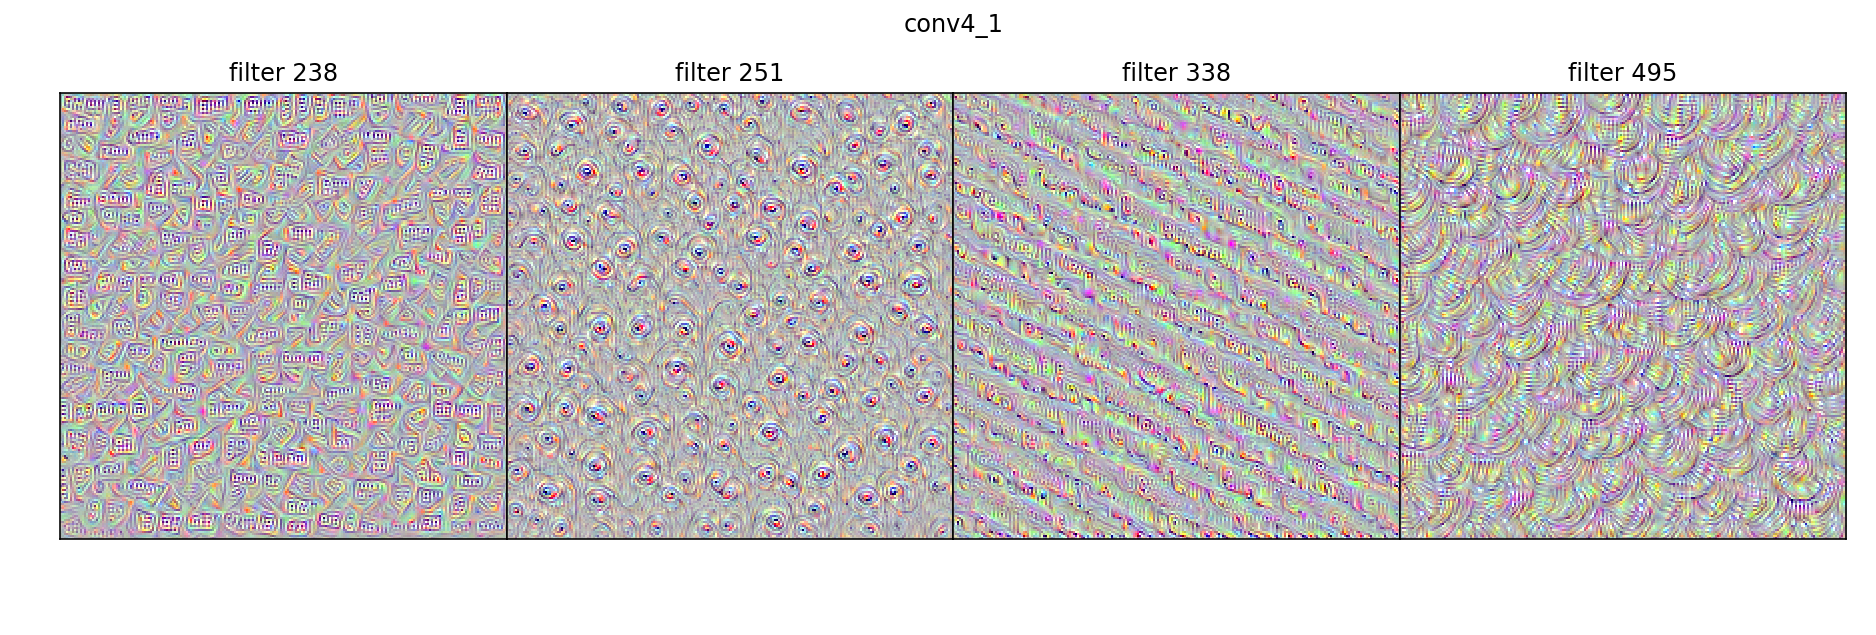

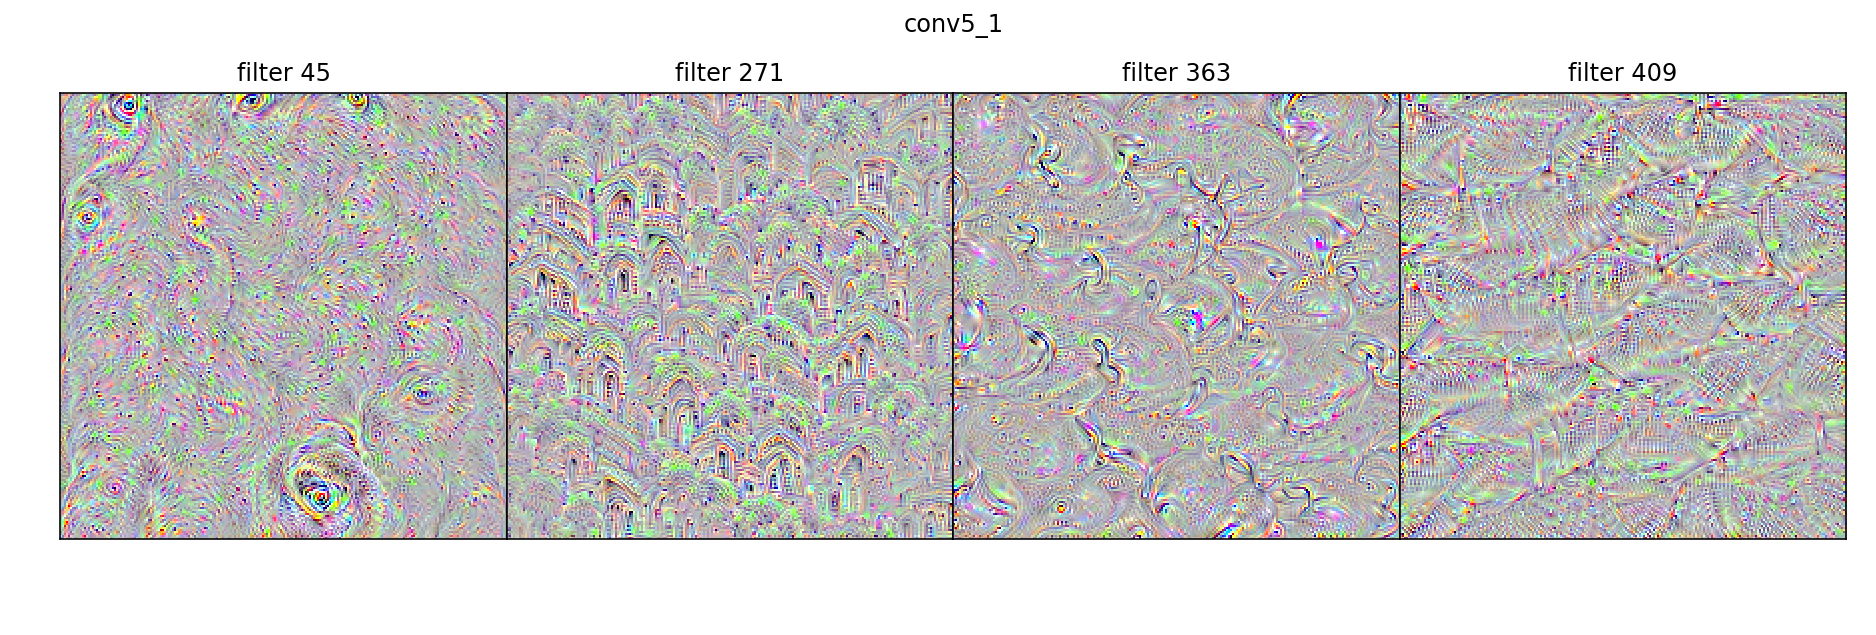

In [6]:
g_ascent.visualize(conv1_2, conv1_2_filters, title='conv1_2');
g_ascent.visualize(conv2_1, conv2_1_filters, title='conv2_1');
g_ascent.visualize(conv3_1, conv3_1_filters, title='conv3_1');
g_ascent.visualize(conv4_1, conv4_1_filters, title='conv4_1');
g_ascent.visualize(conv5_1, conv5_1_filters, title='conv5_1');

We can see that, in the earlier layers (conv1_2, conv2_1), filters get activated by colors and simple patterns such as virtical, horisontal and diagonal lines.

In the intermediate layers (conv3_1, conv4_1), we start to see more complex patterns.

Then oncepts like 'eye' (filter 45) and 'entrance (?)' (filter 271) seem to appear in the last layer (conv5_1).

### 4. Other ways to use `GradientAscent`

#### 4-1. `GradientAscent.visualize`: randomly select filters

If you have a convolutional layer you want to vizualise, but you don't know which filters to choose, you can just pass in the layer to `visualize` without `filter_idxs`. It will randomly choose filters. You can adjust the number of filters chosen by passing `num_subplots` (default=4).

In [0]:
g_ascent.visualize(conv5_1, title='Randomly selected filters from conv5_1');

#### 4-2. `GradientAscent.visualize`: plot one filter

If you just want to visualize one filter, you can do so by specifying the filter index as an integer, not a list.

In [0]:
g_ascent.visualize(conv5_1, 3, title='conv5_1 filter 3');

#### 4-3. `GradientAscent.visualize`: return image tensor

If you want to grab the optimized image data, set `return_output` to `True`.

In [0]:
output = g_ascent.visualize(conv5_1, 3, title='conv5_1 filter 3', return_output=True);

print('num_iter:', len(output))
print('optimized image:', output[-1].shape)

#### 4-4. `GradientAscent.deepdream`: create DeepDream

You can create a [DeepDream](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html) by supplying a path to your own image.

This will optimize the supplied image, instead of a random input noise, with regards to the filter specidied.

In [0]:
g_ascent.deepdream('./images/jay.jpg', conv5_1, 33)

#### 4-5. `GradientAscent.optimize`: perform optimization only (no visualization)

If no visualization is needed, or if you want to futher customize visualization, you can call the `optimize` method directly.

In [0]:
output = g_ascent.optimize(conv5_1, 3)

print('num_iter:', len(output))
print('optimized image:', output[-1].shape)